In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist, fashion_mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.optimizers import SGD

from sklearn.metrics import confusion_matrix

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

## Detection of the presence of handwritten digits

Preparing the data

In [4]:
chosen = np.random.choice(60000, 30000) #indices

In [5]:
X_train_ex2 = X_train[chosen]
print('Initial training set shape :', X_train.shape)
print('Our training set shape :', X_train_ex2.shape)

Initial training set shape : (60000, 28, 28)
Our training set shape : (30000, 28, 28)


In [6]:
# non digit data
non_digit_train = np.array(np.random.uniform(1, 255, 30000*28*28)).reshape(30000, 28, 28)
non_digit_test = np.array(np.random.uniform(1, 255, 10000*28*28)).reshape(10000, 28, 28)

In [9]:
######################
## With random images

train_set_ran = np.concatenate((X_train_ex2, non_digit_train), axis=0).reshape(60000, 28, 28, 1)
test_set_ran = np.concatenate((X_test, non_digit_test), axis=0).reshape(20000, 28, 28, 1)

######################
# one-hot encode target column
train_label = to_categorical(np.concatenate((np.ones(shape=30000), np.zeros(shape=30000)), axis=0))
test_label = to_categorical(np.concatenate((np.ones(shape=10000), np.zeros(shape=10000)), axis=0))

Scaling

In [10]:
train_set = train_set.astype('float32')
test_set = test_set.astype('float32')
# normalize to range (0,1)
train_set = train_set/255
test_set = test_set/255
train_set_ran = train_set_ran/255
test_set_ran = test_set_ran/255

### Training the CNN with random images

As usual when working with image data, we'll be using a CNN. In this case, we'll be using a convolutional layer with 3x3 kernel with a 'relu' activation function, which is proven to be best practice since it overcomes the vanishing gradient problem, and thus produces faster and better results. After a pooling and a flatten layer, the rest of the architecture of the network will be fully connected, composed of a single hidden layer of 4 neurons, followed by the output layer composed of 2 neurons since our classification is binary. We'll be using the sigmoid activation function.

In [13]:
model_ran = Sequential()
model_ran.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model_ran.add(MaxPooling2D((2, 2)))
model_ran.add(Flatten())
model_ran.add(Dense(4, activation='relu', kernel_initializer='he_uniform'))
model_ran.add(Dense(2, activation='sigmoid'))
# compile the model
opt = SGD(lr=0.01, momentum=0.9)
model_ran.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
m_ran = model_ran.fit(train_set_ran, train_label, validation_data=(test_set_ran, test_label), epochs=2)

Epoch 1/2
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0028 - accuracy: 0.9989 - val_loss: 1.0224e-06 - val_accuracy: 1.0000
Epoch 2/2
1875/1875 [==============================] - 12s 6ms/step - loss: 4.8683e-07 - accuracy: 1.0000 - val_loss: 2.4479e-07 - val_accuracy: 1.0000


We can see that the network converges pretty rapidly

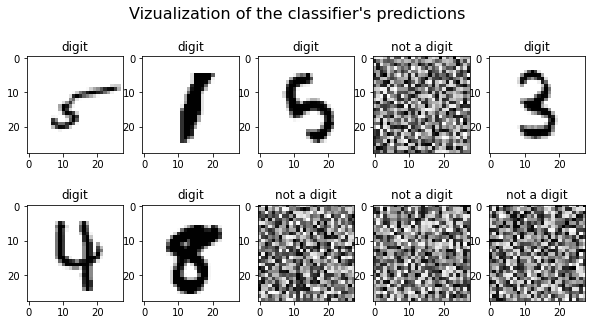

In [144]:
random_viz = np.random.choice(20000, 10)
fig, ax = plt.subplots(2, 5, figsize=(10, 5))

images = test_set_ran[random_viz]
labels = model_ran.predict(test_set_ran)[random_viz]
for i in range(10):
    image = images[i]
    label = labels[i][1]
    if label == 1 : label = 'digit'
    else : label = 'not a digit'
    ax[i//5, i % 5].imshow(image, cmap='gray_r')
    ax[i//5, i % 5].set_title(label)
_=fig.suptitle('Vizualization of the classifier\'s predictions', fontsize = 16)